<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Build/blob/master/build1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Wrangling And Visualization***
* **Dataset:** https://archive.ics.uci.edu/ml/datasets/Parkinsons

* **Dataset information:**
This dataset is composed of a range of biomedical voice measurements from people with Parkinson's disease (PD) or without PD. Each column in the table is a particular voice measure, and each row corresponds one of voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.
> 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

## *Loading dataset*

In [71]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

#url_label ="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data

--2020-06-25 19:31:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-httpd-php]
Saving to: ‘parkinsons.data.1’

parkinsons.data.1   100%[===================>]  39.74K  --.-KB/s    in 0.03s   

2020-06-25 19:31:50 (1.23 MB/s) - ‘parkinsons.data.1’ saved [40697/40697]



In [72]:
import pandas as pd
import numpy as np


In [73]:
data_set = pd.read_csv(url)
# data_set_labels = pd.read_csv(url_label,sep='\s+', header=None)

## *Exploring and Cleaning*

Initial data exploration gives us some insight about the size of dataset, data types and class labels. Looking at our data reveals that all the features are numeric with a binary class label named "status". We remove the "name" column as it doesn't contain useful information for the purpose of our analysis.

In [100]:
print(data_set.shape)
data_set.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [101]:
htm1 = pd.DataFrame.to_html(data_set.head())

In [102]:
htm1

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>name</th>\n      <th>MDVP:Fo(Hz)</th>\n      <th>MDVP:Fhi(Hz)</th>\n      <th>MDVP:Flo(Hz)</th>\n      <th>MDVP:Jitter(%)</th>\n      <th>MDVP:Jitter(Abs)</th>\n      <th>MDVP:RAP</th>\n      <th>MDVP:PPQ</th>\n      <th>Jitter:DDP</th>\n      <th>MDVP:Shimmer</th>\n      <th>MDVP:Shimmer(dB)</th>\n      <th>Shimmer:APQ3</th>\n      <th>Shimmer:APQ5</th>\n      <th>MDVP:APQ</th>\n      <th>Shimmer:DDA</th>\n      <th>NHR</th>\n      <th>HNR</th>\n      <th>status</th>\n      <th>RPDE</th>\n      <th>DFA</th>\n      <th>spread1</th>\n      <th>spread2</th>\n      <th>D2</th>\n      <th>PPE</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>phon_R01_S01_1</td>\n      <td>119.992</td>\n      <td>157.302</td>\n      <td>74.997</td>\n      <td>0.00784</td>\n      <td>0.00007</td>\n      <td>0.00370</td>\n      <td>0.00554</td>\n      <td>0.01109</td>\n

In [75]:
data_set.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

We split our dataset into data X and label y.

In [76]:
X = data_set.iloc[:,1:].drop(labels="status", axis=1)
y = data_set["status"]
print(f'data: {X.shape}\nlabel: {y.shape}')

data: (195, 22)
label: (195,)


In [77]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [78]:
y.value_counts()
print(f'Number of patients diagnosed with PD: {y.value_counts()[1]}')
print(f'Number of patients without PD: {y.value_counts()[0]}')

Number of patients diagnosed with PD: 147
Number of patients without PD: 48


In [99]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:APQ,NHR,HNR,RPDE,DFA,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.000044,0.003446,0.024081,0.024847,21.885974,0.498536,0.718099,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.000035,0.002759,0.016947,0.040418,4.425764,0.103942,0.055336,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.000007,0.000920,0.007190,0.000650,8.441000,0.256570,0.574282,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.000020,0.001860,0.013080,0.005925,19.198000,0.421306,0.674758,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.000030,0.002690,0.018260,0.011660,22.085000,0.495954,0.722254,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.000060,0.003955,0.029400,0.025640,25.075500,0.587562,0.761881,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.000260,0.019580,0.137780,0.314820,33.047000,0.685151,0.825288,0.450493,3.671155,0.527367


In [104]:
htm1 = pd.DataFrame.to_html(X.describe())
htm1

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>MDVP:Fo(Hz)</th>\n      <th>MDVP:Fhi(Hz)</th>\n      <th>MDVP:Flo(Hz)</th>\n      <th>MDVP:Jitter(Abs)</th>\n      <th>MDVP:PPQ</th>\n      <th>MDVP:APQ</th>\n      <th>NHR</th>\n      <th>HNR</th>\n      <th>RPDE</th>\n      <th>DFA</th>\n      <th>spread2</th>\n      <th>D2</th>\n      <th>PPE</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n      <td>195.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>154.228641</td>\n      <td>197.104918</td>\n      <td>116.324631</td>\n      <td>0.000044</td>\n      <td>0.003446

## *Handling Missing Data*
A quick check shows our dataset does not have any missing value to either drop or fill. 

In [80]:
X.isna().sum(axis=0).sort_values(axis=0, ascending=False, inplace=False)
X.isna().sum(axis=0).sum(axis=0)

0

## *Visualization*

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import seaborn as sns
import numpy.linalg as LA
from scipy import stats
# import math


### *Violin Plot*

We look at each feature to see its distribution and relationship in respect to the class label. Before plotting we normalize our data to be able to visualize all features in one plot and compare them together.



In [82]:
scaler = StandardScaler()
z_fit = scaler.fit_transform(X)

print(z_fit.shape, type(z_fit))
Z=pd.DataFrame(data=z_fit, columns=X.columns)


(195, 22) <class 'numpy.ndarray'>


In [83]:
Z_join = pd.concat([y, Z.iloc[:,:]], axis=1)

In [84]:
data = pd.melt(Z_join,id_vars="status", var_name="features", value_name='value')
data

,status,features,value
0,1,MDVP:Fo(Hz),-0.829300
1,1,MDVP:Fo(Hz),-0.770972
2,1,MDVP:Fo(Hz),-0.909476
3,1,MDVP:Fo(Hz),-0.909622
4,1,MDVP:Fo(Hz),-0.925657
...,...,...,...
4285,0,PPE,-0.817703
4286,0,PPE,-0.418929
4287,0,PPE,-0.832410
4288,0,PPE,-0.926105


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

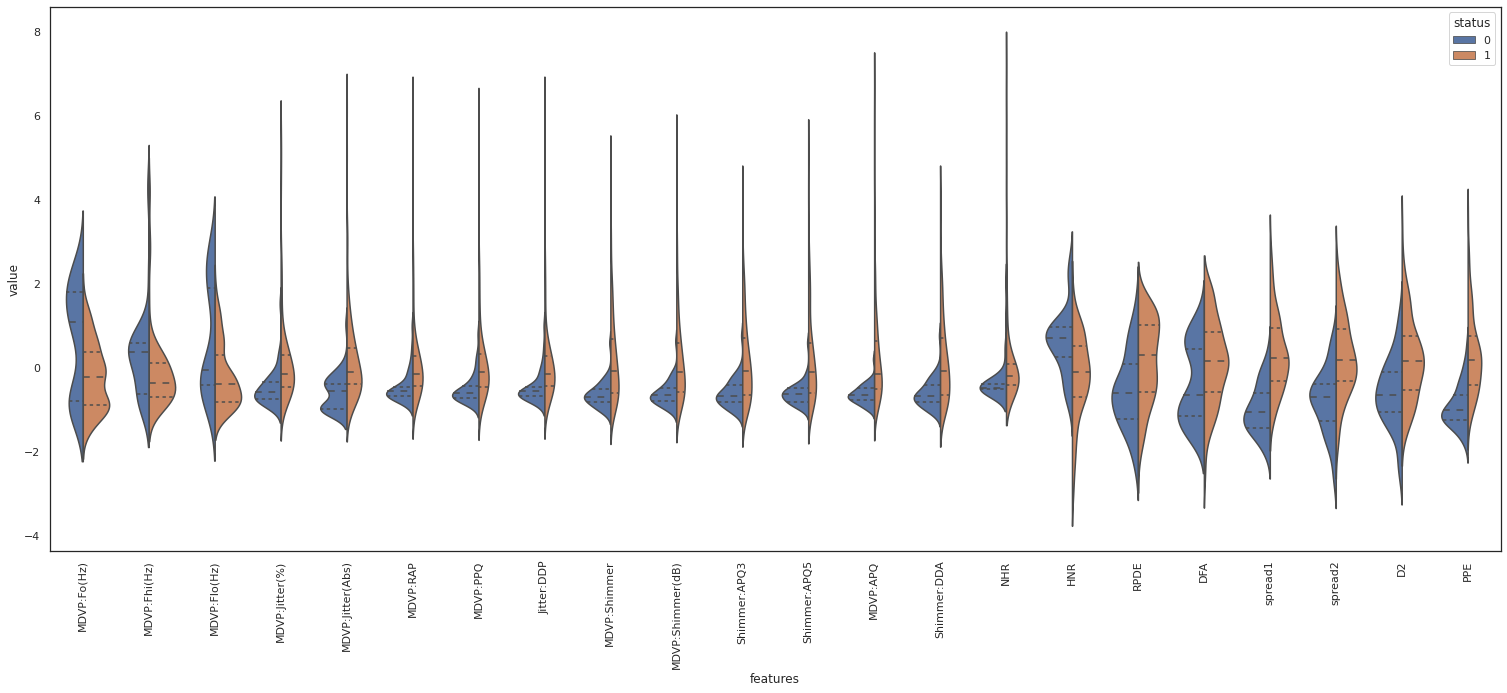

In [85]:
plt.figure(figsize=(26,10))
sns.violinplot(x="features", y="value", hue="status", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

For example PRDE, spread1 and PPE show a separation of their median value based on the class label. Therefore those variables are deemed important for "status" classification. On the other hand, NHR shows the same median for both classes. So it doesn't seem to be direcetly related to the class label.

### *Box plot*
Alternatively we can create box plot to get quartiles information for each feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

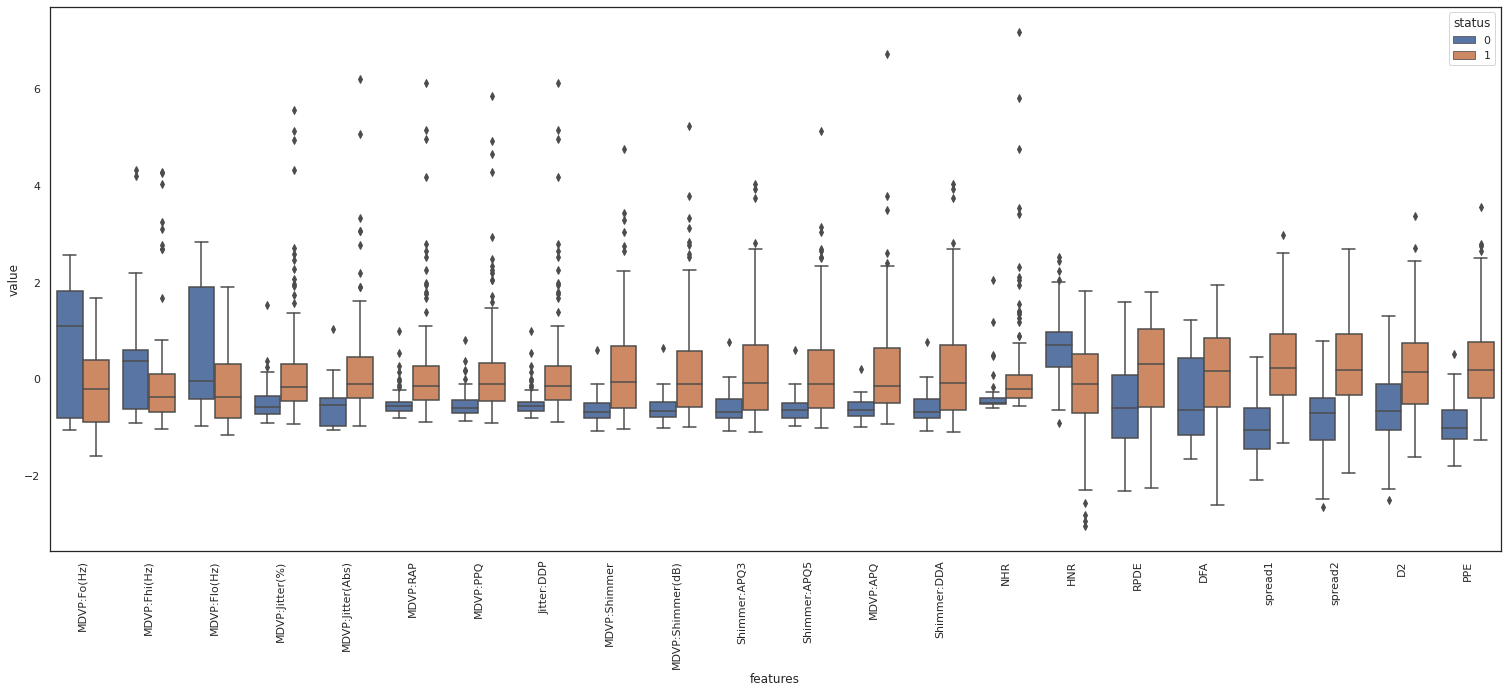

In [86]:
plt.figure(figsize=(26,10))
sns.boxplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

From the above box plot we observe that MDVP features have similar range of values and distribution. Provided they are corrolated we can drop the redundant features.

### *swarmplot*
swarmplot shows all the observations in the same context as violin or boxplot. 
We observe spread1 and PPE seem to be good features to separate the dataset based on the class label. On the contrary, class labels are spread across DFA, and it does not seem to be a good candidate to separate the data based on the class label.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

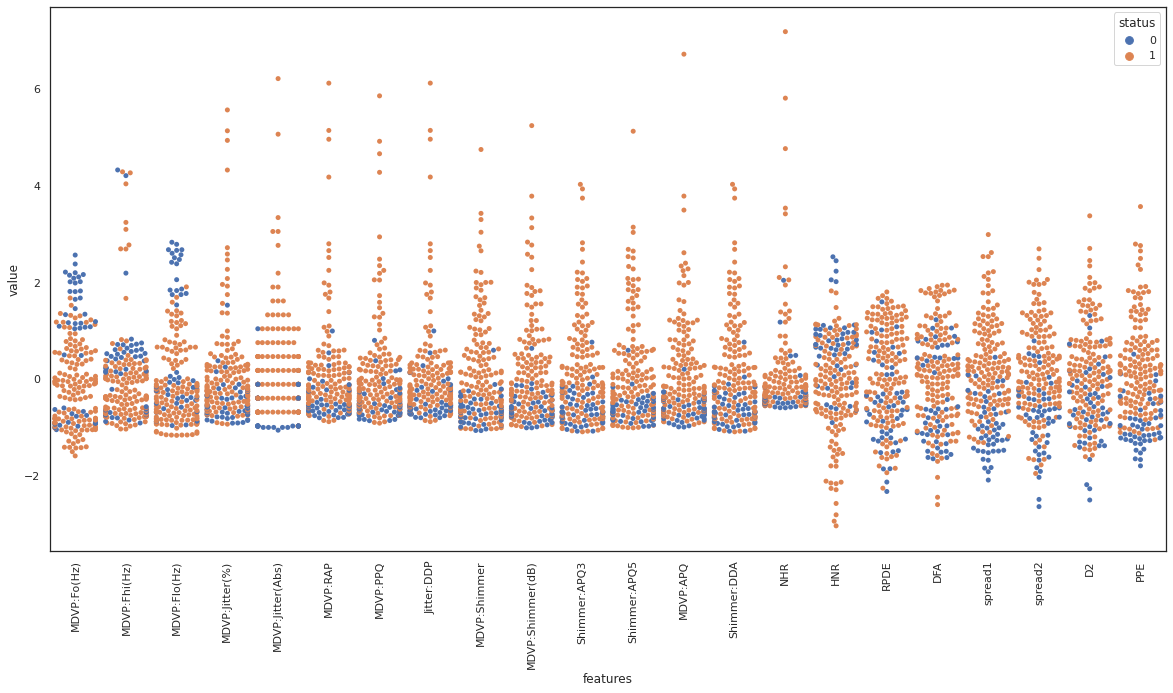

In [87]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

In [88]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

### *joinplot*
Moving to statistical analysis we are going to verify some of the observations that we made earlier. Below we see a correlation factor of 0.99 between two of the MDVP features, confirming a strong linear correlation. This is a redundancy in the dataset that can be removed.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


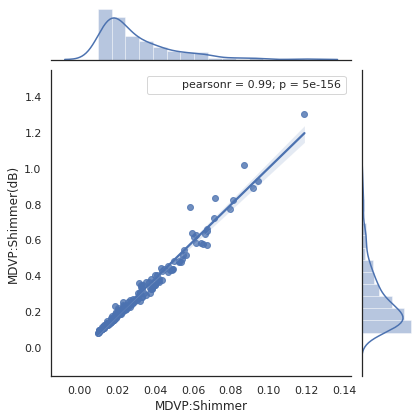

In [91]:
def plot_join_plot(df, feature, target):
  j = sns.jointplot(feature, target, data = df, kind ='reg')
  j.annotate(stats.pearsonr)
  return

# plot_join_plot(X, X.loc[:,'MDVP:Shimmer'], X.loc[:,'MDVP:Shimmer(dB)'])
plot_join_plot(X, 'MDVP:Shimmer', 'MDVP:Shimmer(dB)')

plt.show()

### *pairplot*
To evaluate the correlation of multiple variable at the same time we use PaiGrid from seaborn library.

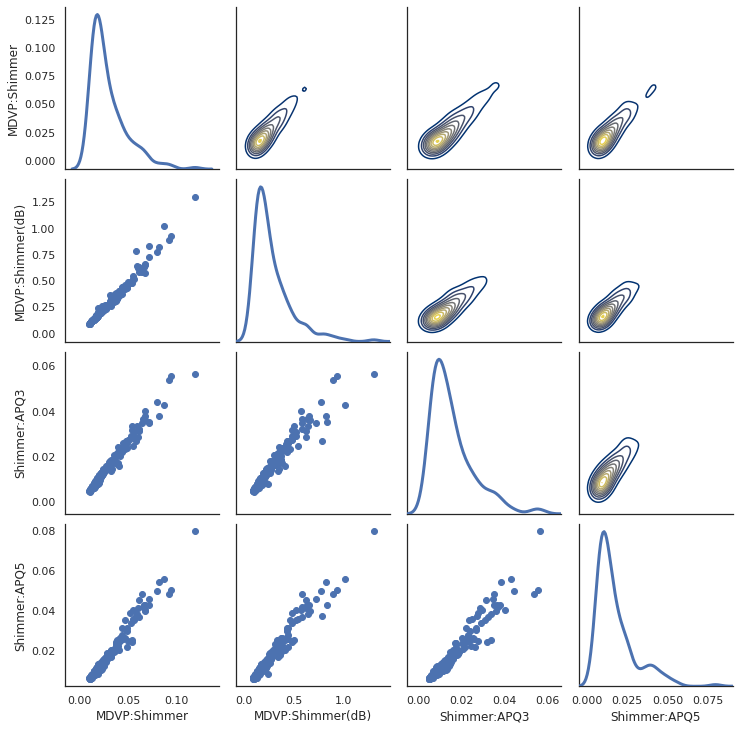

In [94]:
sns.set(style="white")
df1 = X.loc[:,['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5']]
pp = sns.PairGrid(df1, diag_sharey=False)
# pp = sns.PairGrid(df1)

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('corrolated features', fontsize=14)
# plt.show()
pp.map_upper(sns.kdeplot, cmap="cividis")
pp.map_lower(plt.scatter)
pp.map_diag(sns.kdeplot, lw=3)

### *Heatmap*
We use heatmap to see the correlation map of the entire features.
Below are the features that are linearly correlated.
* MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP (we keep MDVP:PPQ)
* MDVP:Shimmer, MDVP:Shimmer(dB), 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA' (we keep 'MDVP:APQ')
* spread1, PPE (we keep PPE)

We can look at the previous plots to decide which one of them we want to keep, and drop the rest.



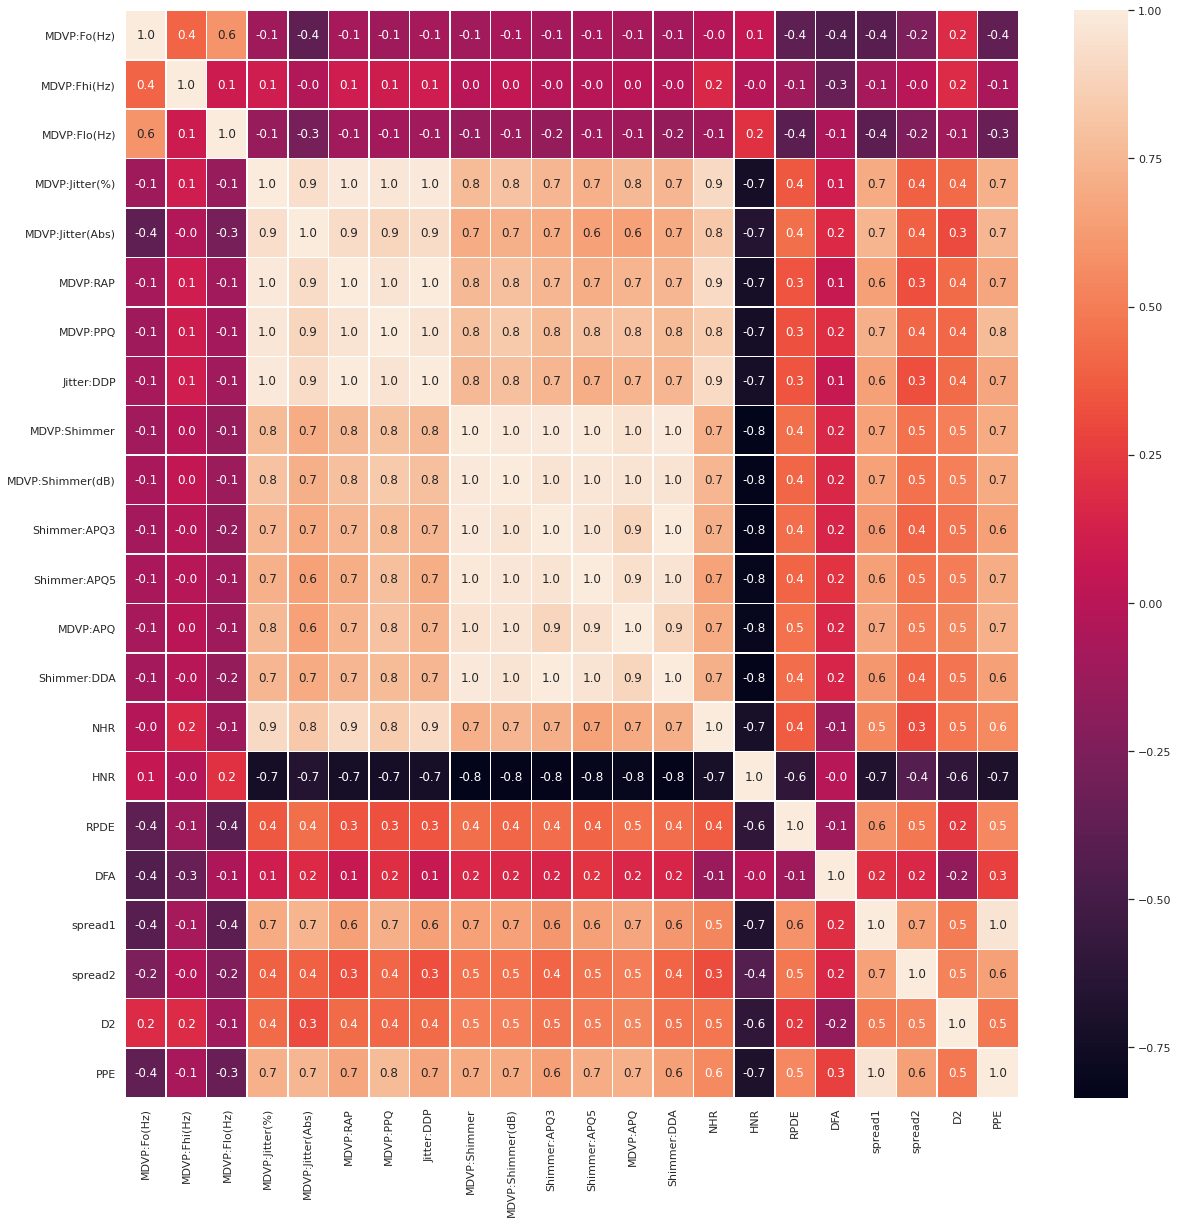

In [ ]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

## *Drop linearly correlated columns*
Instead of visual inspection we could have directly extract the correlation coefficients from the correlation matrix.



In [95]:
corr_pct = 0.98
col_corr = set()
for i in range(len(X.corr().columns)):
    for j in range(i):
        if abs(X.corr().iloc[i, j]) > corr_pct:
          print(f'{X.corr().columns[i]} and {X.corr().columns[j]} correlated by {X.corr().iloc[i, j]}')
          col = X.corr().columns[i]
          col_corr.add(col)
print(col_corr, len(col_corr), type(col_corr))


MDVP:RAP and MDVP:Jitter(%) correlated by 0.9902755852458308
Jitter:DDP and MDVP:Jitter(%) correlated by 0.9902762153275696
Jitter:DDP and MDVP:RAP correlated by 0.999999600104134
MDVP:Shimmer(dB) and MDVP:Shimmer correlated by 0.9872578145507641
Shimmer:APQ3 and MDVP:Shimmer correlated by 0.9876250519099836
Shimmer:APQ5 and MDVP:Shimmer correlated by 0.9828354477070599
Shimmer:DDA and MDVP:Shimmer correlated by 0.9876256527301991
Shimmer:DDA and Shimmer:APQ3 correlated by 0.9999999636932829
{'Shimmer:APQ5', 'MDVP:RAP', 'Shimmer:DDA', 'MDVP:Shimmer(dB)', 'Jitter:DDP', 'Shimmer:APQ3'} 6 <class 'set'>


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


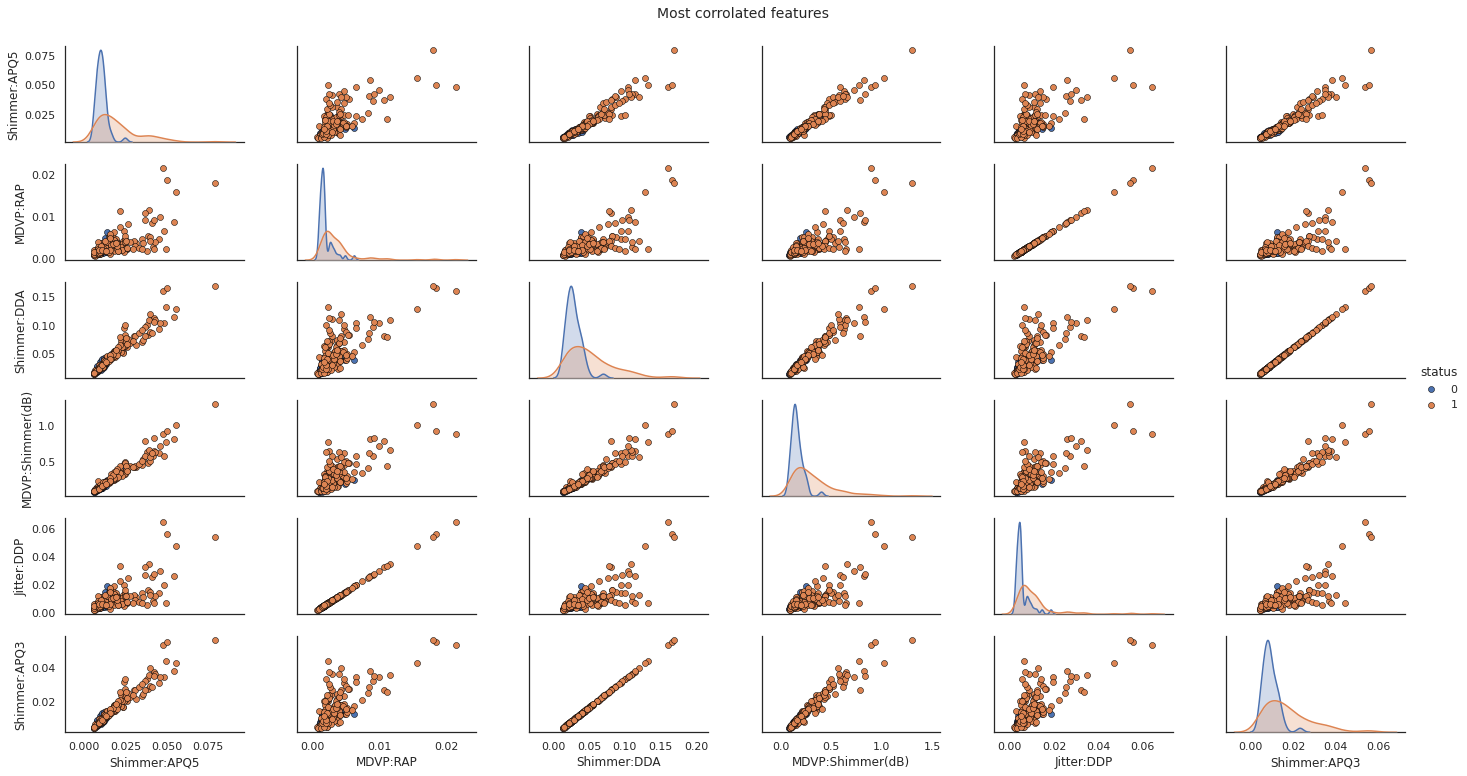

In [ ]:
# Scatter Plot with Hue for visualizing data in 3-D
X_join = pd.concat([X[col_corr],y], axis=1)

pp = sns.pairplot(X_join, hue="status", size=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Most corrolated features', fontsize=14)
plt.show()

After dropping the redundant columns, The number of columns are reduced to 13. For sanity check we plot the heatmap again.

In [96]:
col_drop = ['MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA', 'spread1']
X = X.drop(col_drop, axis=1)
X.shape

(195, 13)

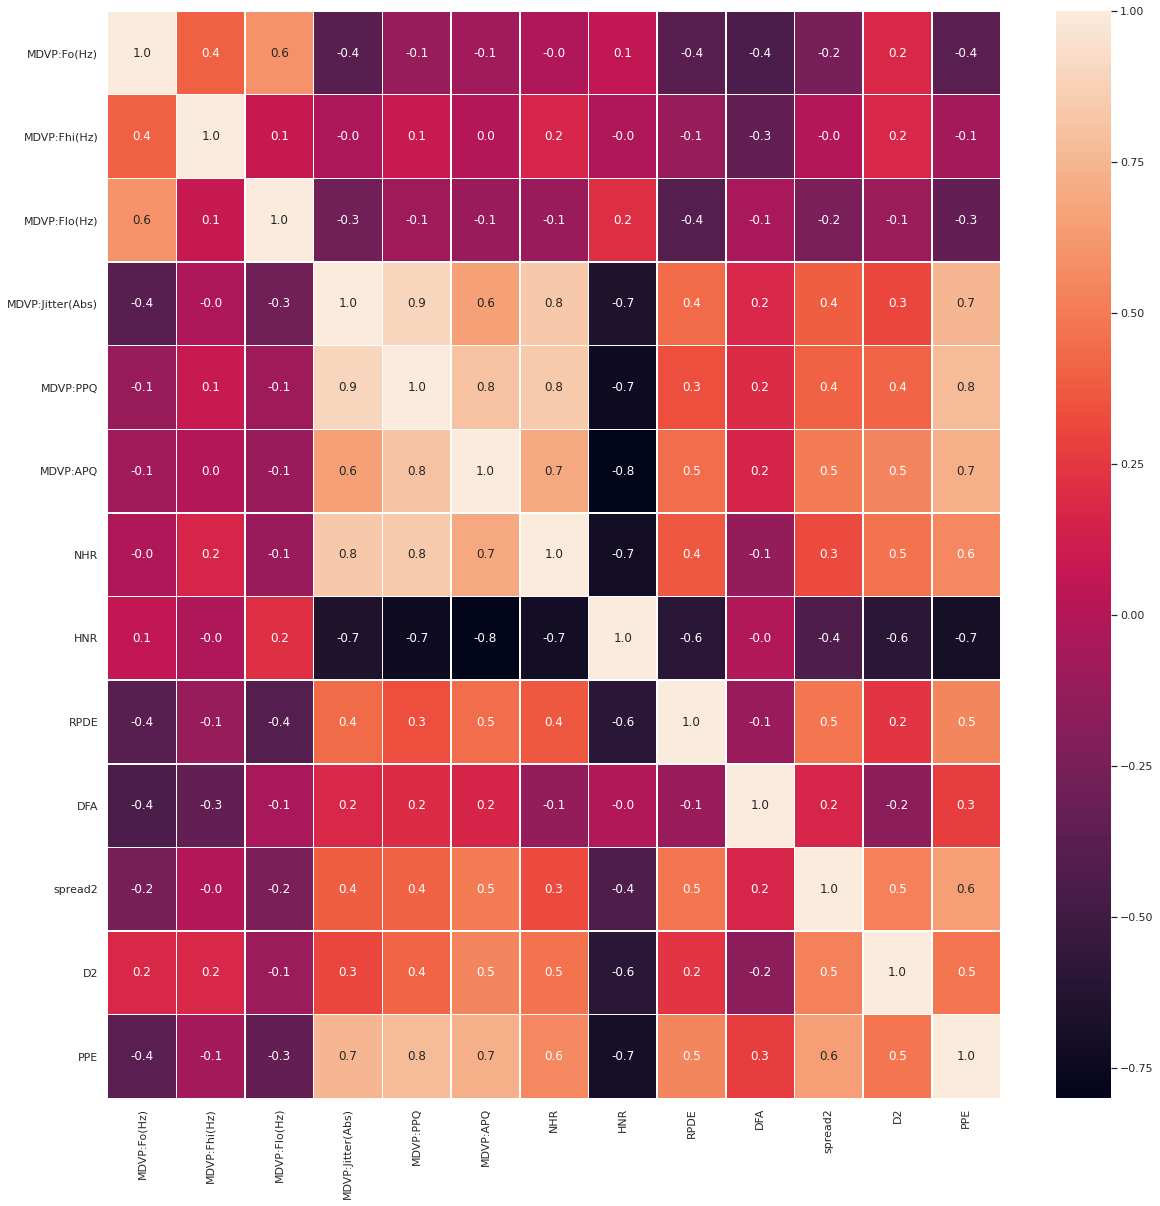

In [97]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

## Merge cleaned up data
* In case some rows from X were removed in the process, we would need to align rows od X and y again. We use inner merge between X and y to achieve this.

In [98]:
df = pd.merge(X, y, left_index=True, right_index=True)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X.shape

(195, 13)

## PCA Dimension Reduction
Now let's attempt to reduce the dimension of the cleaned up data by Principal Component Analysis technique.

First we need to standardize our data. This is done by StandardScalar utility class.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [ ]:
scaler = StandardScaler()
z_fit = scaler.fit_transform(X.values)
Z = pd.DataFrame(z_fit, index=X.index, columns=X.columns)
print(z_fit.shape, type(z_fit))

(195, 13) <class 'numpy.ndarray'>


In [ ]:
pca = PCA()
pca_features = pca.fit_transform(Z.values)

After fitting data into PCA model, we create the Scree plot. Looking at the cumulative sum of explained variance we need to keep only 5 component to retain 90% collective variance of our data.

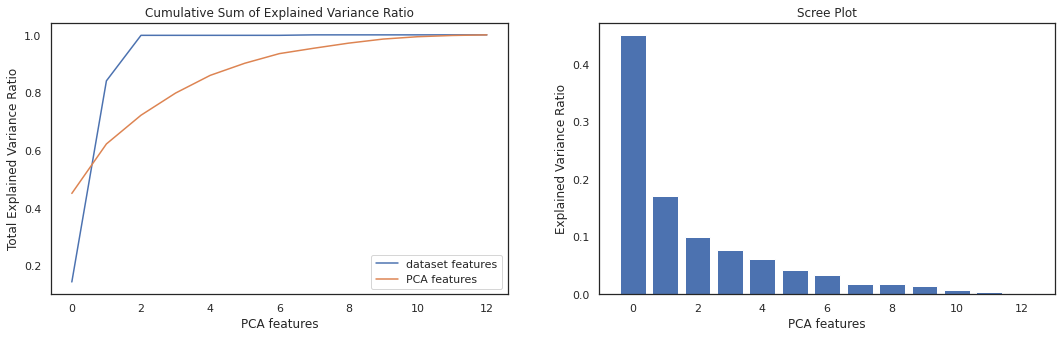

In [ ]:
X_var_ratio = X.var()/(X.var().sum())

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
ax1.plot(range(len(X.var())), X_var_ratio.cumsum(), label="dataset features")
ax1.plot(range(len(X.var())), np.cumsum(pca.explained_variance_ratio_), label="PCA features")

ax1.set_title("Cumulative Sum of Explained Variance Ratio")
ax1.set_xlabel('PCA features')
ax1.set_ylabel('Total Explained Variance Ratio')
ax1.axis('tight')
ax1.legend(loc='lower right')

ax2.bar(x=range(len(X.columns)), height=pca.explained_variance_ratio_)

ax2.set_title('Scree Plot')
ax2.set_xlabel('PCA features')
ax2.set_ylabel('Explained Variance Ratio')

plt.show()

In [ ]:
pca_num = (np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9))[0][0]
pca_num

5

In [ ]:
pca = PCA(pca_num)
pca_features = pca.fit_transform(Z.values)
print(pca_features.shape, type(pca_features))

(195, 5) <class 'numpy.ndarray'>


In [ ]:
df_pca = pd.DataFrame(pca_features)
df_pca.head(2)

,0,1,2,3,4
0,1.238385,-1.689528,1.223741,-0.212443,1.111227
1,2.623116,-1.342726,1.623372,-1.175761,0.810393


Looking at the swarmplot, we notice that principal components P0 and P3 are most related to our class label.

In [ ]:
pca_data = pd.melt(pd.concat([df_pca,y], axis=1),id_vars="status", var_name="PCA_features", value_name='value')
pca_data

,status,PCA_features,value
0,1,0,1.238385
1,1,0,2.623116
2,1,0,2.138530
3,1,0,2.340294
4,1,0,2.853460
...,...,...,...
970,0,4,-0.322368
971,0,4,0.103267
972,0,4,0.181372
973,0,4,1.167129


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

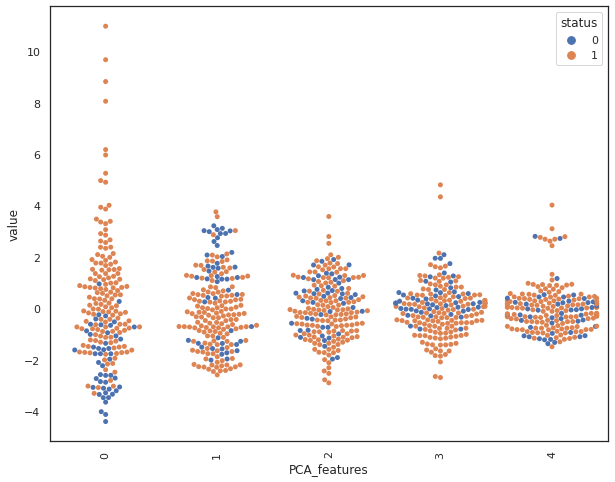

In [ ]:
plt.figure(figsize=(10,8))
sns.swarmplot(x="PCA_features", y="value", hue="status", data=pca_data)
plt.xticks(rotation=90)

A scatter plot shows class label separation between P0 and P3.


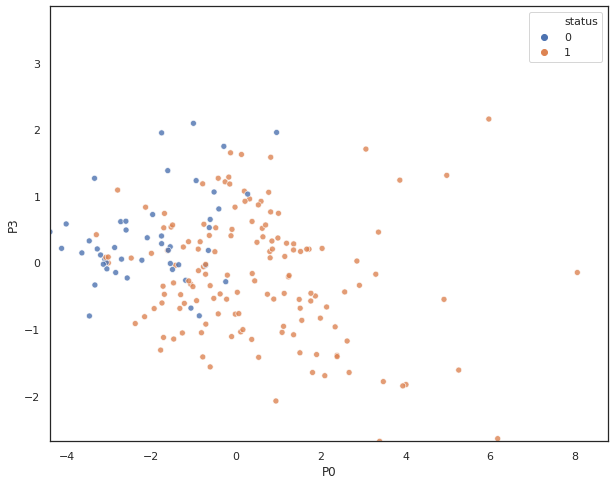

In [ ]:
x_data = df_pca.iloc[:,0]
y_data = df_pca.iloc[:,3]
plt.figure(figsize=(10,8))
sns.scatterplot(
    x= x_data, y= y_data,
    hue=y,
    legend="full",
    alpha=0.8
)
plt.xlim(x_data.min(),0.8*x_data.max())
plt.ylim(y_data.min(),0.8*y_data.max())
plt.xlabel("P0")
plt.ylabel("P3")

plt.show()

## K-means Clustering
Finally we utilize PCA features to cluster our data for classification. Since our class label is binary, we partition our data into two clusters.

In [ ]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

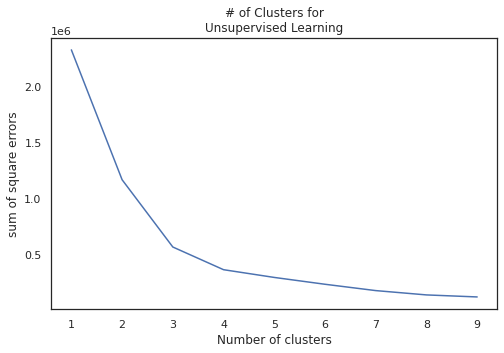

In [ ]:
sqr_err = []
for i in range(1,10):
  kmeans = KMeans(i)
  # kmeans.fit(df_pca.values)
  kmeans.fit(X)

  sqr_err.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(range(1,10), sqr_err)
plt.xlabel("Number of clusters")
plt.ylabel("sum of square errors")
plt.title("# of Clusters for\nUnsupervised Learning")
plt.show()

In [ ]:
kmeans=KMeans(2)
kmeans.fit(X)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0]


In [ ]:
def swap_label(y, kmeans, swap_key):
  return np.logical_xor(kmeans.labels_,swap_key).astype(int)

To show the benefit of PCA, first we run the k-means cluster on original features and then the pca features. Then we compare their class separation by creating scatter plot.

In [ ]:
def scatter_comp(xdata, ydata, y, cluster_label):
  x_data = xdata
  y_data = ydata
  plt.figure(figsize=(16,10))
  
  ax0 = plt.subplot(2,2,1)
  sns.scatterplot(
    x= x_data, y= y_data,
    hue = y,
    cmap='viridis',
    legend="full",
    alpha=1,
    ax=ax0
    )
  ax0.set_xlim(x_data.min(),x_data.max())
  ax0.set_ylim(y_data.min(),y_data.max())
  ax0.set_xlabel(x_data.name)
  ax0.set_ylabel(y_data.name)
  ax0.set_title("Class label")

  ax1 = plt.subplot(2,2,2)
  sns.scatterplot(
    x= x_data, y= y_data,
    hue= cluster_label,
    cmap='viridis',
    legend="full",
    alpha=1,
    ax=ax1
    )
  ax1.set_xlim(x_data.min(),x_data.max())
  ax1.set_ylim(y_data.min(),y_data.max())
  ax1.set_xlabel(x_data.name)
  ax1.set_ylabel(y_data.name)
  ax1.set_title("Cluster Label")

  return plt.show()

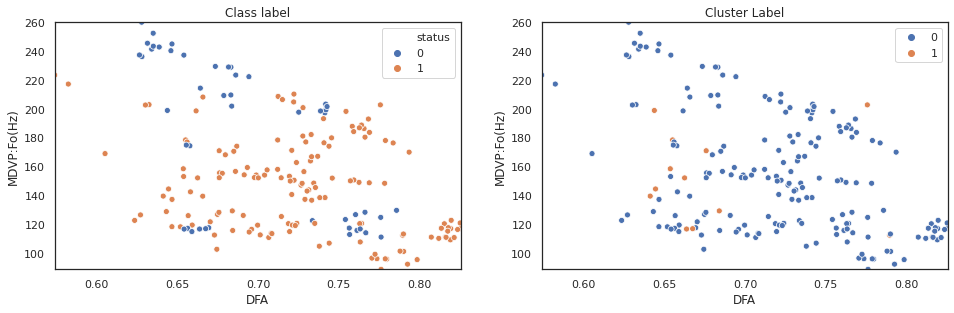

In [62]:
# mix: (DFA, MDVP:Fo(Hz), RPDE)
# Separate: (PPE, MDVP:PPQ)

cluster_label = swap_label(y, kmeans, False)

scatter_comp(X["DFA"], X["MDVP:Fo(Hz)"], y, cluster_label)
# scatter_comp(X["PPE"], X["MDVP:PPQ"], y, cluster_label)

In [ ]:
(y==cluster_label).sum()/len(y)

0.27692307692307694

The above plot shows k-means clustering cannot effectively separate observations based on original data features. Next step, we will repeat the sam process on pca features.

In [63]:
kmeans = KMeans(2)
kmeans.fit(pca_features)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

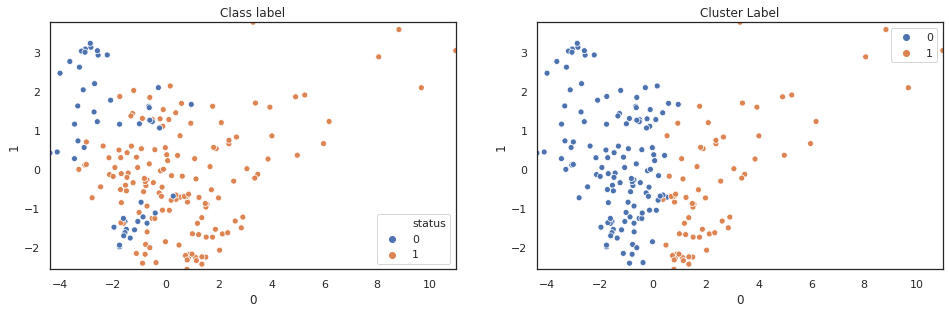

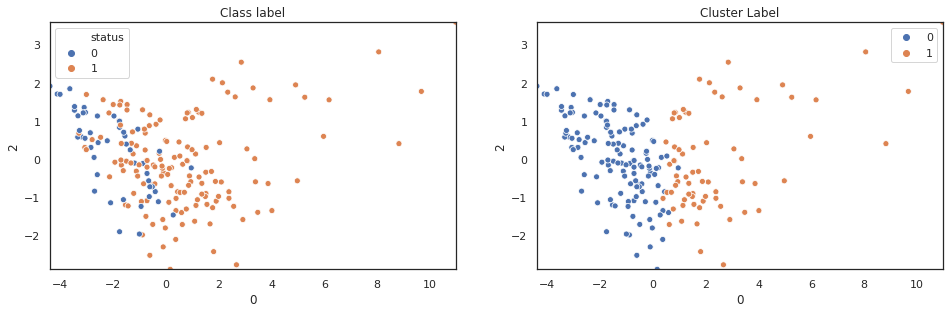

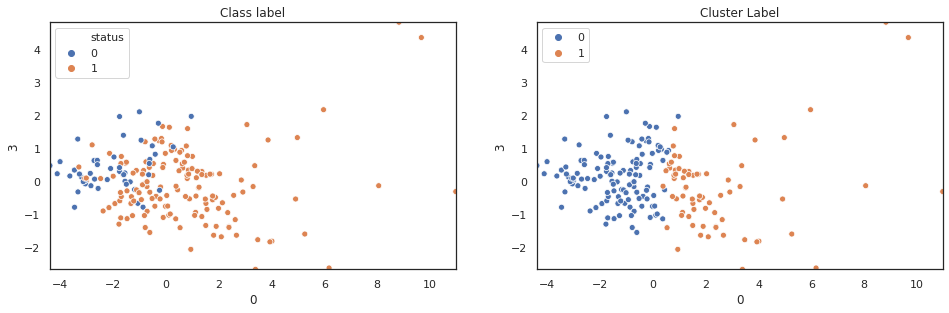

In [64]:
pca_label = swap_label(y, kmeans, False)


scatter_comp(df_pca[0], df_pca[1], y, pca_label)
scatter_comp(df_pca[0], df_pca[2], y, pca_label)
scatter_comp(df_pca[0], df_pca[3], y, pca_label)

In [ ]:
(y==pca_label).sum()/len(y)


0.6051282051282051

k-means clustering over pca features shows noticable classification improvement over original features.

## Conclusion
The process of inspecting, visualizing, cleaning, transforming, and modeling of the data with the objective of extracting useful information and drawing conclusion is data analysis. 
We took a numerical dataset related to Parkinson's disease from UCI Machine Learning Repository. We went through every steps of the above, to analyze this dataset.